### Student Name : Sapna Girme

#### AI ASSIGNMENT 3

## Build an ANN model for Drug classification.

# Data Preprocessing

In [1]:
#import required lib
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Visualizations

C:\Users\sapna\AppData\Local\Temp\ipykernel_137564\2262716150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['BP'], palette='bright')


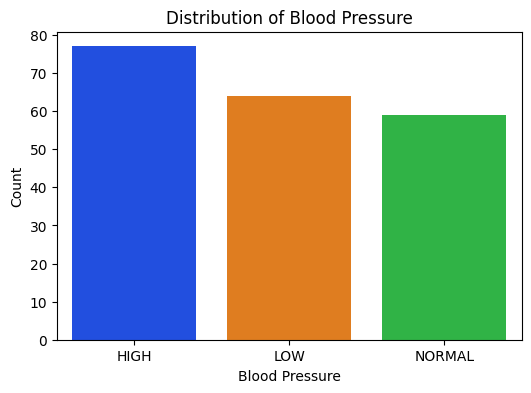

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x=df['BP'], palette='bright')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

C:\Users\sapna\AppData\Local\Temp\ipykernel_137564\3015763282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Drug'], palette='bright')


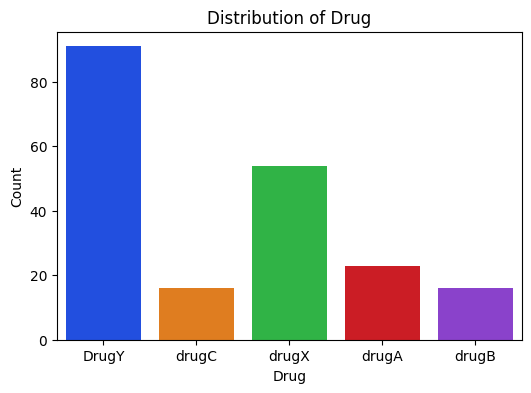

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Drug'], palette='bright')
plt.title('Distribution of Drug')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.show()

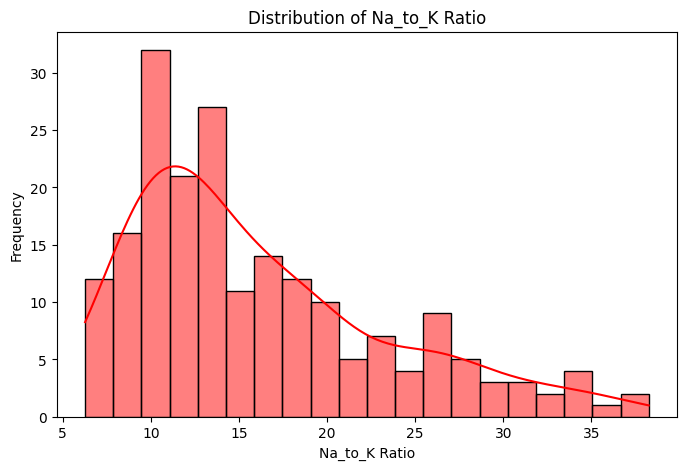

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Na_to_K'], bins=20, kde=True, color='red')
plt.title('Distribution of Na_to_K Ratio')
plt.xlabel('Na_to_K Ratio')
plt.ylabel('Frequency')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df['Sex']=le.fit_transform(df.Sex)
df['BP']=le.fit_transform(df.BP)
df['Cholesterol']=le.fit_transform(df.Cholesterol)
df['Drug']=le.fit_transform(df.Drug)

In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [11]:
df['Drug'].value_counts()

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64

In [12]:
x=df.drop('Drug',axis=1).values
y=df['Drug'].values

In [13]:
x

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043],
       [22.   ,  0.   ,  2.   ,  0.   ,  8.607],
       [49.   ,  0.   ,  2.   ,  0.   , 16.275],
       [41.   ,  1.   ,  1.   ,  0.   , 11.037],
       [60.   ,  1.   ,  2.   ,  0.   , 15.171],
       [43.   ,  1.   ,  1.   ,  1.   , 19.368],
       [47.   ,  0.   ,  1.   ,  0.   , 11.767],
       [34.   ,  0.   ,  0.   ,  1.   , 19.199],
       [43.   ,  1.   ,  1.   ,  0.   , 15.376],
       [74.   ,  0.   ,  1.   ,  0.   , 20.942],
       [50.   ,  0.   ,  2.   ,  0.   , 12.703],
       [16.   ,  0.   ,  0.   ,  1.   , 15.516],
       [69.   ,  1.   ,  1.   ,  1.   , 11.455],
       [43.   ,  1.   ,  0.   ,  0.   , 13.972],
       [23.   ,  1.   ,  1.   ,  0.   ,  7.298],
       [32.   ,  0.   ,  0.   ,  1.   , 25.974],
       [57.   ,  1. 

In [14]:
y

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [24]:
x

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.28652212],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.82855818],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.14996267],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27179427],
       [-1.35218642, -1.040833  ,  1.32976279, -0.97043679, -1.03769314],
       [ 0.28388946, -1.040833  ,  1.32976279, -0.97043679,  0.02643885],
       [-0.20087376,  0.96076892,  0.10979693, -0.97043679, -0.70046821],
       [ 0.9504389 ,  0.96076892,  1.32976279, -0.97043679, -0.12676951],
       [-0.07968296,  0.96076892,  0.10979693,  1.03046381,  0.45567206],
       [ 0.16269866, -1.040833  ,  0.10979693, -0.97043679, -0.59916196],
       [-0.62504158, -1.040833  , -1.11016894,  1.03046381,  0.43221897],
       [-0.07968296,  0.96076892,  0.10979693, -0.97043679, -0.09832049],
       [ 1.79877454, -1.040833  ,  0.1

# Model Building

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_train.shape,x_test.shape

((160, 5), (40, 5))

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
#creating ANN Skeleton
model=Sequential()
model.add(Dense(5, activation='relu')) # input layer
model.add(Dense(8, activation='relu'))  #1st Hidden layer
model.add(Dense(16, activation='relu'))#2nd hidden layer
model.add(Dense(32, activation='relu'))#3rd hidden layer
model.add(Dense(units=len(df['Drug'].unique()), activation='softmax')) #Output Layer

In [44]:
#Compling ANN model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
#Training the model
#model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.1)
model.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.9312
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.9375
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.9375
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9375
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9438
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9438
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9438
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9500
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9563
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9563
Epoch 11/

16/16 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 0.9812
Epoch 84/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0410 - accuracy: 0.9875
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9937
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9875
Epoch 87/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 0.9937
Epoch 88/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9937
Epoch 89/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9937
Epoch 90/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9875
Epoch 91/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9937
Epoch 92/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9875
Epoch 93/100


In [55]:
y_test

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [56]:
from sklearn.metrics import accuracy_score
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy=accuracy_score(y_test,y_pred_classes)
print('Accuracy:',accuracy)

Accuracy: 0.875


# Checking on random data

In [57]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
y_p = model.predict((scaler.transform([[61,	0,	1,	0,	18.043]])))

predicted_class = np.argmax(y_p)
predicted_drug = le.inverse_transform([predicted_class])[0]  #inversing the Standard Scaling

print("Predicted Drug:", predicted_drug)

1/1 [==============================] - 0s 45ms/step
Predicted Drug: DrugY
